# 시각화 라이브러리

## 3. 시본(Seaborn) 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 건강검진 데이터 불러오기와 전처리하기
df_rawdata_health = pd.read_excel('./Data/health_screenings_2020_1000ea.xlsx')

df_mod00_health = df_rawdata_health.loc[:,['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
df_mod00_health.loc[df_mod00_health['gender']==1,['gender']]='Male'
df_mod00_health.loc[df_mod00_health['gender']==2,['gender']]='Female'
df_mod00_health.loc[df_mod00_health['drinking']==0,['drinking']]='Non-drinking'
df_mod00_health.loc[df_mod00_health['drinking']==1,['drinking']]='Drinking'
df_mod00_health.loc[(df_mod00_health['smoking']==1) | (df_mod00_health['smoking']==2),['smoking']]='Non-smoking'
df_mod00_health.loc[df_mod00_health['smoking']==3,['smoking']]='Smoking'

In [5]:
# 음주여부와 흡연상태 데이터 준비
drinking = df_mod00_health.groupby(['gender', 'drinking'])['drinking'].count()
smoking = df_mod00_health.groupby(['gender', 'smoking'])['smoking'].count()
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')
drinking = drinking.reset_index()
smoking = smoking.reset_index()

In [6]:
drinking, smoking

(   gender      drinking  count
 0  Female      Drinking    213
 1  Female  Non-drinking    305
 2    Male      Drinking    356
 3    Male  Non-drinking    126,
    gender      smoking  count
 0  Female  Non-smoking    500
 1  Female      Smoking     18
 2    Male  Non-smoking    321
 3    Male      Smoking    161)

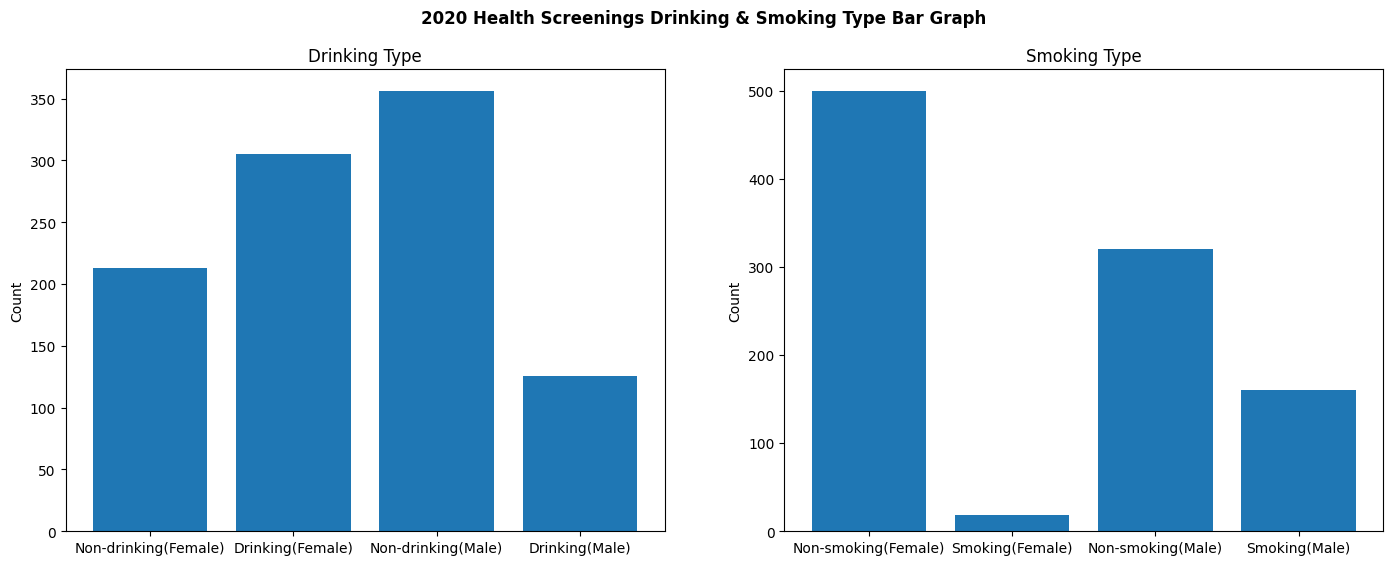

In [7]:
# 성별 음주 여부와 흡연 상태 막대 그래프
fig, axs = plt.subplots(1, 2)

fig.set_size_inches(17,6)
fig.suptitle('2020 Health Screenings Drinking & Smoking Type Bar Graph',fontweight='bold')

index = np.arange(4)

axs[0].bar(index, drinking['count'])
axs[0].set_title('Drinking Type')
axs[0].set_ylabel('Count')
axs[0].set_xticks(index, ['Non-drinking(Female)','Drinking(Female)','Non-drinking(Male)','Drinking(Male)'])

axs[1].bar(index, smoking['count'])
axs[1].set_title('Smoking Type')
axs[1].set_ylabel('Count')
axs[1].set_xticks(index, ['Non-smoking(Female)', 'Smoking(Female)', 'Non-smoking(Male)', 'Smoking(Male)'])

plt.show()

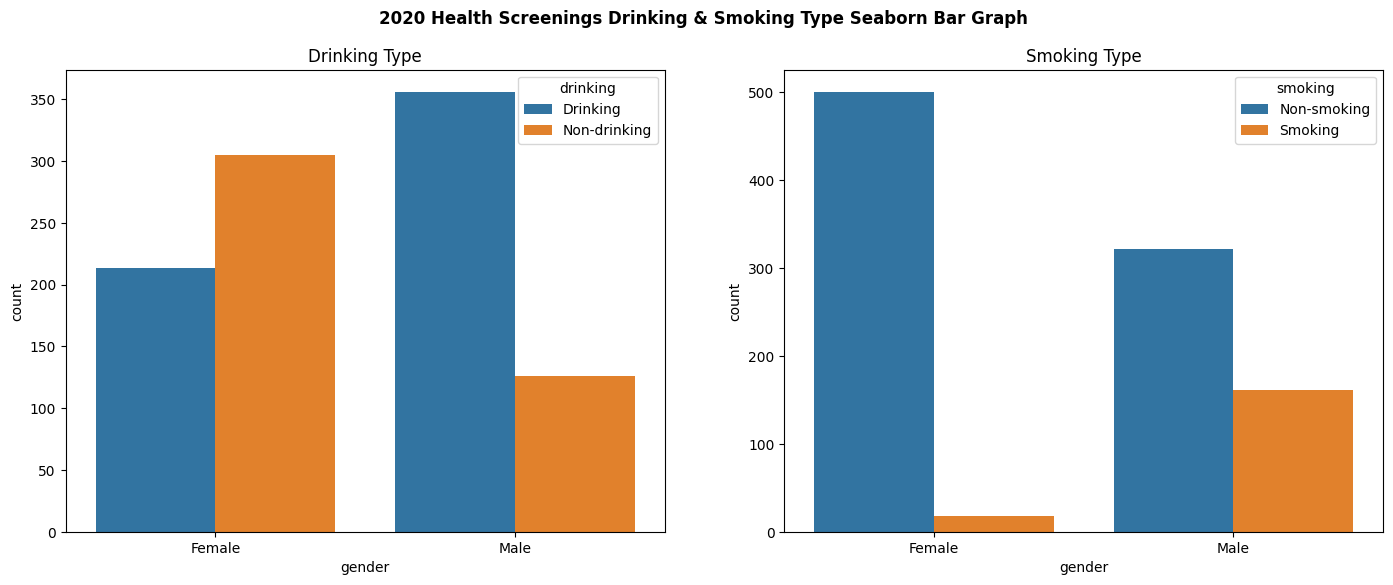

In [15]:
# 성별 음주 여부와 흡연상태 시본 막대 그래프
fig, axs = plt.subplots(1, 2)

fig.set_size_inches(17,6)
fig.suptitle('2020 Health Screenings Drinking & Smoking Type Seaborn Bar Graph', fontweight='bold')

axs0 = sns.barplot(data=drinking, x='gender', y='count', hue='drinking', ax=axs[0])
axs1 = sns.barplot(data=smoking, x='gender', y='count', hue='smoking', ax=axs[1])

axs[0].set_title('Drinking Type')
axs[1].set_title('Smoking Type')

plt.show()

In [16]:
#남성과 여성의 성별, 몸무게, 허리둘레, 음주여부, 흡연상태 데이터 가져오기
male_data = df_mod00_health.loc[df_mod00_health.gender=='Male',['gender','weight','waist','drinking','smoking']]
female_data = df_mod00_health.loc[df_mod00_health.gender=='Female',['gender','weight','waist','drinking','smoking']]

In [13]:
min(female_data['waist'])

53.0

In [14]:
max(male_data['waist'])

128.0

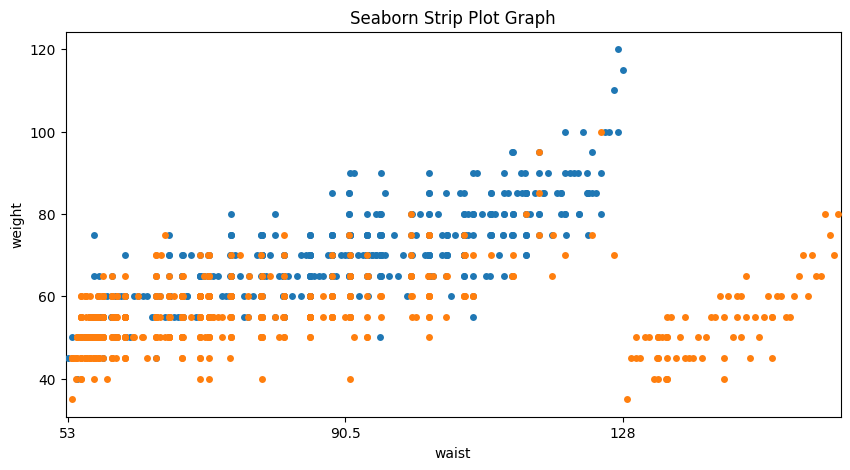

In [17]:
# 남성과 여성의 허리둘레와 몸무게 시본 스트립 플롯 그래프
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

sns.stripplot(data=male_data, x='waist', y='weight')
sns.stripplot(data=female_data, x='waist', y='weight')
#sns.stripplot(data=df_mod00_health, x='waist', y='weight', hue='gender')

ax.set_title('Seaborn Strip Plot Graph')
ax.set_xticks(np.arange(0,127,63), labels=[53, 90.5, 128])

plt.show()

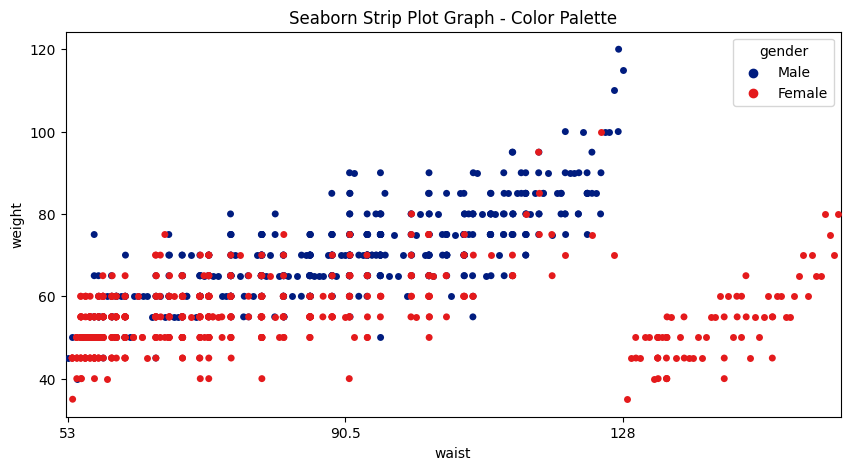

In [18]:
# 남성과 여성의 허리둘레와 몸무게 시본 스트립 플롯 그래프 - 색상 팔레트 지정
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

sns.stripplot(data=male_data, x='waist', y='weight', hue='gender', palette='dark')
sns.stripplot(data=female_data, x='waist', y='weight', hue='gender', palette='Set1')


ax.set_title('Seaborn Strip Plot Graph - Color Palette')
ax.set_xticks(np.arange(0,127,63), labels=[53, 90.5, 128])

plt.show()

In [19]:
# 남성과 여성 데이터 100개 가져오기
male_data_100 = male_data.head(100)
female_data_100 = female_data.head(100)

c:\Projects\Python\venv_py3913\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Projects\Python\venv_py3913\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Projects\Python\venv_py3913\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Projects\Python\venv_py3913\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Projects\Python\venv_py3913\lib\site-packages\seaborn\categorical.py:3544: Us

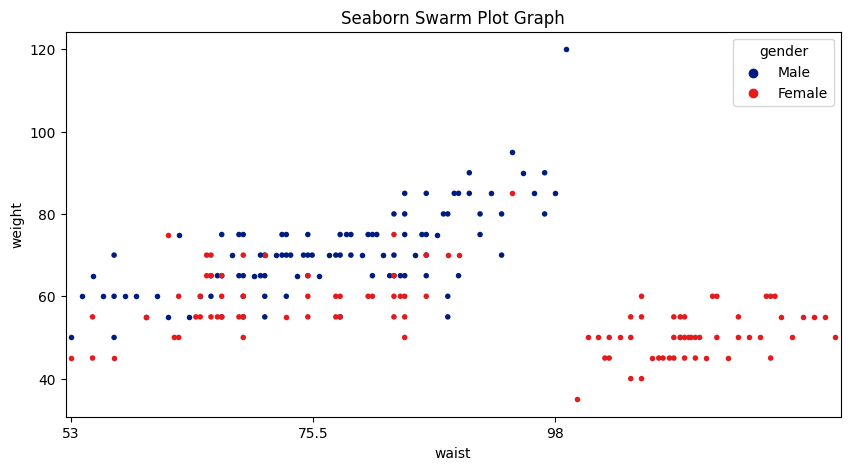

In [21]:
# 남성과 여성의 허리둘레와 몸무게 시본 스웜 플롯 그래프
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

sns.swarmplot(data=male_data_100,x='waist',y='weight',hue='gender',palette='dark',size=4)
sns.swarmplot(data=female_data_100,x='waist',y='weight',hue='gender',palette='Set1',size=4)

ax.set_title('Seaborn Swarm Plot Graph')
ax.set_xticks(np.arange(0,46,22.5), labels=[53, 75.5, 98])

plt.show()

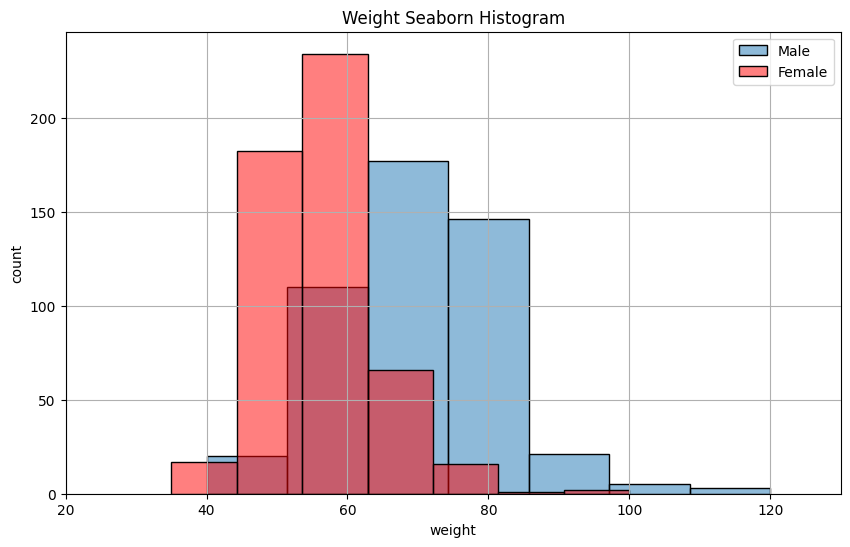

In [22]:
# 남성과 여성의 몸무게 히스토그램 그래프
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

sns.histplot(male_data['weight'], bins=7, alpha=0.5, label='Male')
sns.histplot(female_data['weight'], bins=7, alpha=0.5, label='Female', color='r')

ax.set_xlim(20,130)
ax.set_xlabel('weight')
ax.set_ylabel('count')
ax.set_title('Weight Seaborn Histogram')
ax.legend()
ax.grid()

plt.show()

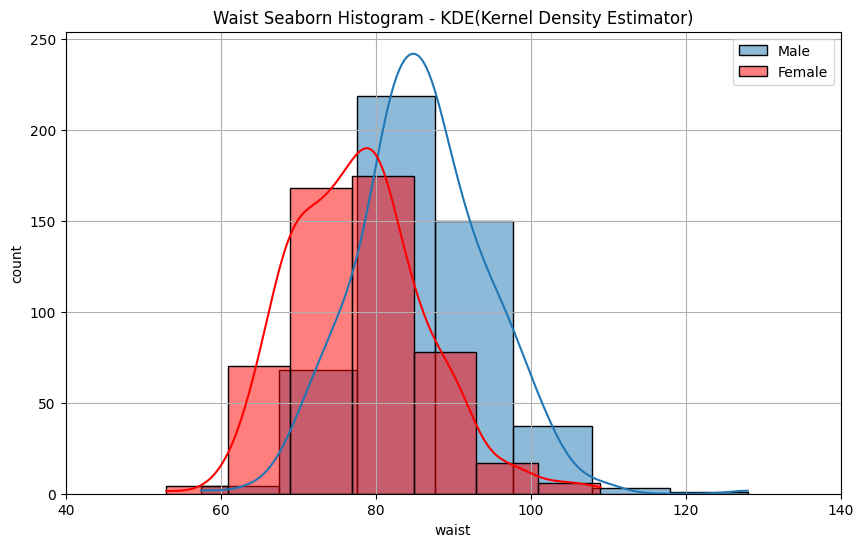

In [23]:
# 남성과 여성의 허리둘레 히스토그램 - 커널밀도추정(KDE) 속성 지정
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

sns.histplot(male_data['waist'], bins=7, alpha=0.5, label='Male', kde=True)
sns.histplot(female_data['waist'], bins=7, alpha=0.5, label='Female', color='r', kde=True)

ax.set_xlim(40,140)
ax.set_xlabel('waist')
ax.set_ylabel('count')
ax.set_title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
ax.legend()
ax.grid()

plt.show()

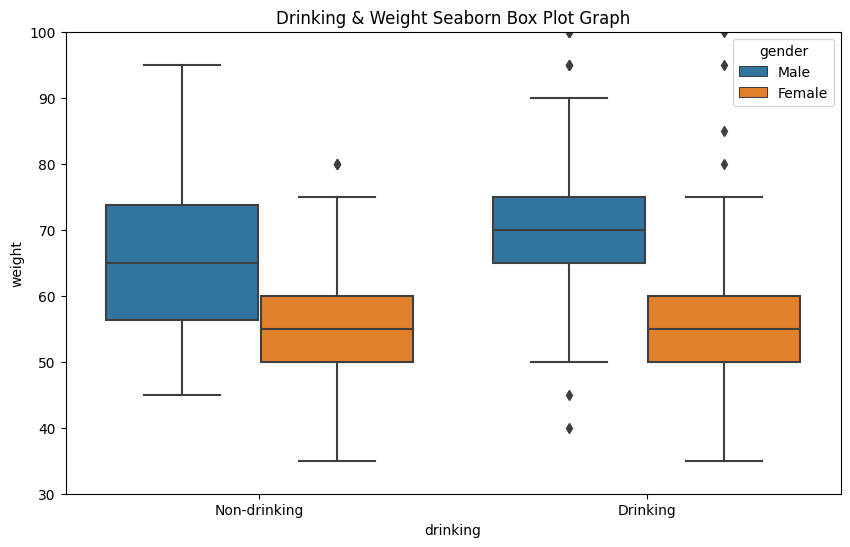

In [25]:
# 음주 여부와 몸무게 상자수염 그래프
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

sns.boxplot(data=df_mod00_health, x='drinking', y='weight', hue='gender')

ax.set_title('Drinking & Weight Seaborn Box Plot Graph')
ax.set_ylim(30,100)

plt.show()

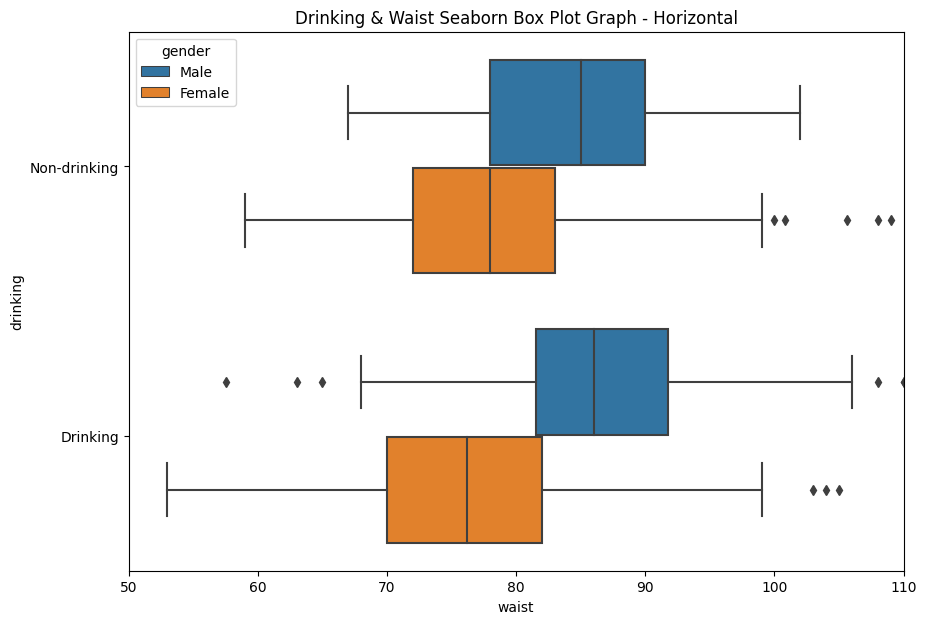

In [26]:
# 음주여부와 허리둘레 가로 상자 수염 그래프
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(data=df_mod00_health, x='waist', y='drinking', hue='gender', orient='h')

ax.set_title('Drinking & Waist Seaborn Box Plot Graph - Horizontal')
ax.set_xlim(50,110)

plt.show()

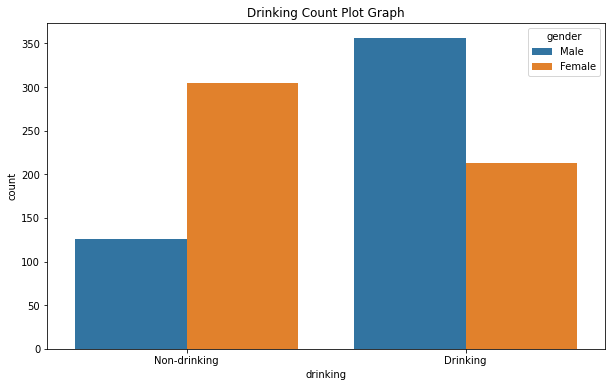

In [19]:
# 성별 음주 여부 카운트 플롯 그래프
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

sns.countplot(data=df_mod00_health, x='drinking', hue='gender')
ax.set_title('Drinking Count Plot Graph')

plt.show()

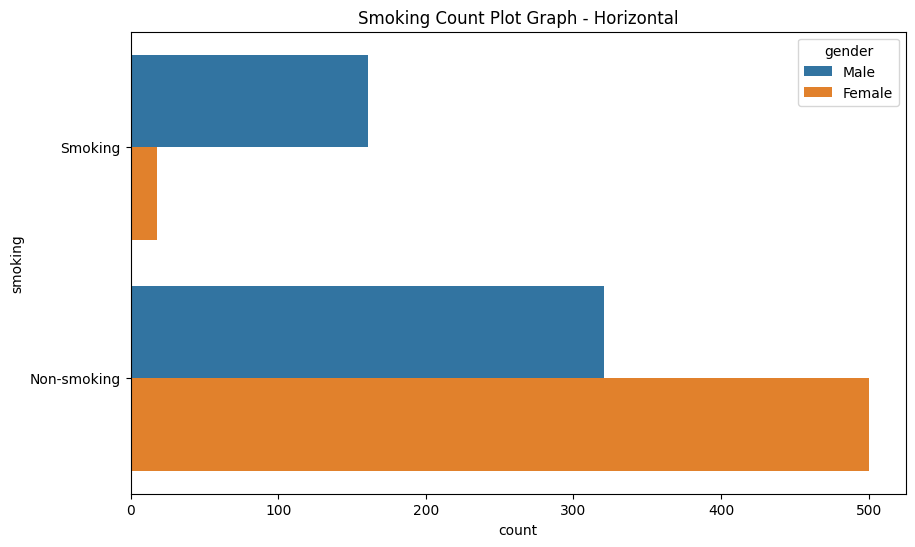

In [27]:
# 성별 흡연상태 가로 카운트 플롯 그래프
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

sns.countplot(data=df_mod00_health, y='smoking', hue='gender', order=['Smoking','Non-smoking'])

ax.set_title('Smoking Count Plot Graph - Horizontal')

plt.show()

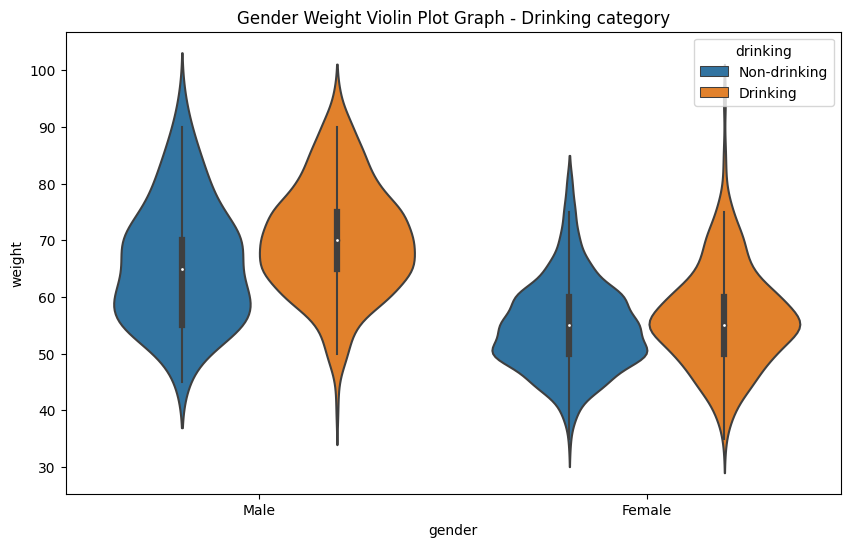

In [28]:
# 성별 몸무게를 음주 여부로 분리하여 그린 바이올린 플롯 그래프
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

sns.violinplot(data=df_mod00_health[df_mod00_health.weight<100], x='gender', y='weight', hue='drinking')
ax.set_title('Gender Weight Violin Plot Graph - Drinking category')

plt.show()

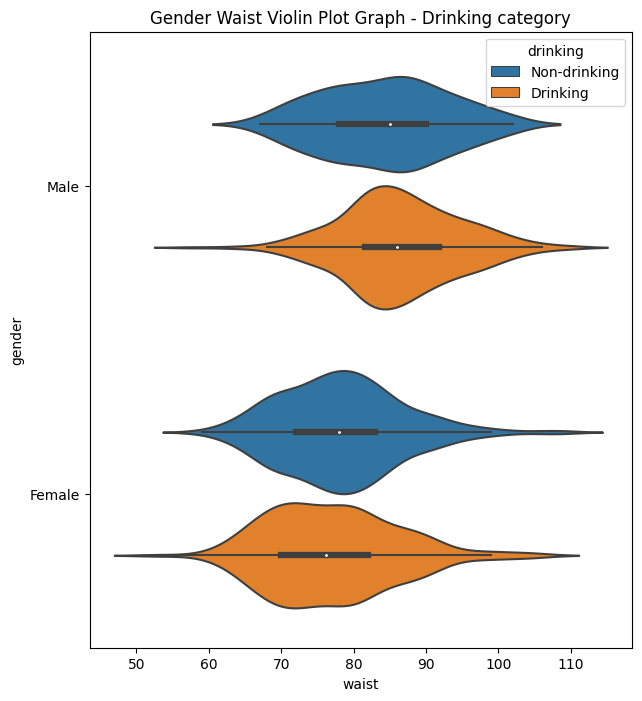

In [29]:
# 성별 허리둘레를 음주 여부로 분리하여 그린 가로 바이올린 플롯 그래프
fig, ax = plt.subplots()
fig.set_size_inches(7,8)

sns.violinplot(data=df_mod00_health[df_mod00_health.waist<120], y='gender', x='waist', hue='drinking')

ax.set_title('Gender Waist Violin Plot Graph - Drinking category')

plt.show()

In [30]:
df_mod01_health03 = df_rawdata_health.loc[:,['gender','weight','waist']]
df_mod01_health08 = df_rawdata_health.loc[:,['gender','weight','waist','drinking','smoking','cholesterol','HDL','LDL']]

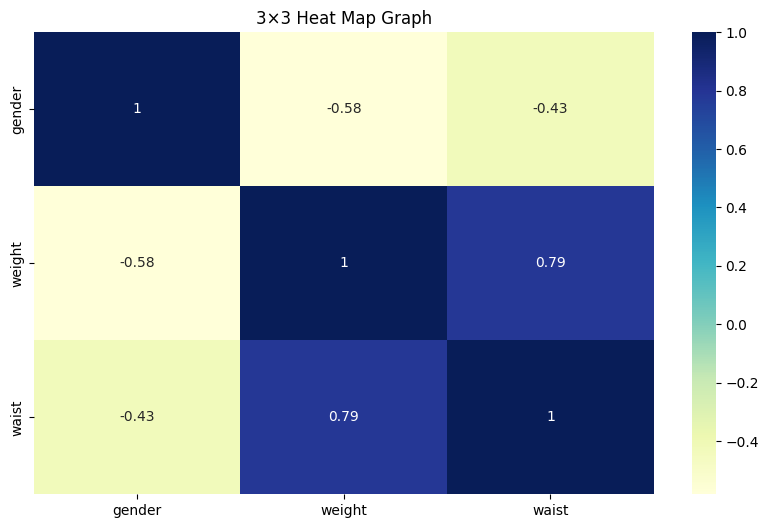

In [31]:
# 3x3 히트맵 그래프
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

correlation_data3 = df_mod01_health03.corr()
sns.heatmap(correlation_data3, annot=True, cmap='YlGnBu')

ax.set_title('3×3 Heat Map Graph')

plt.show()

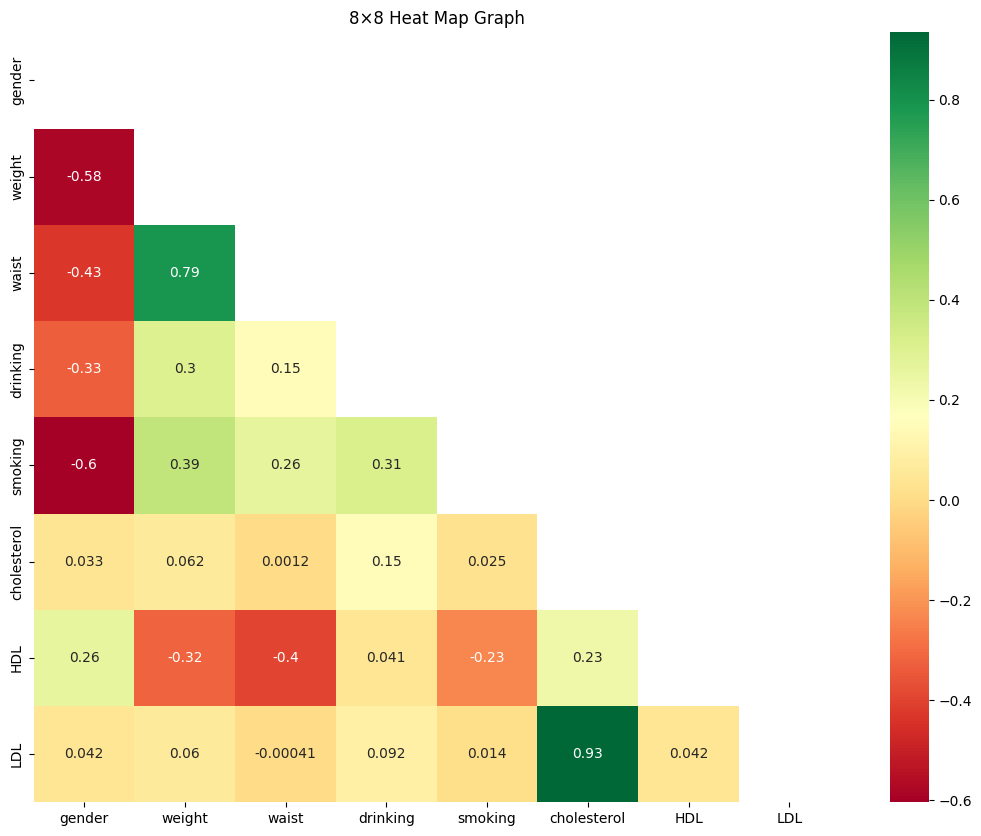

In [37]:
# 8x8 히트맵 그래프
fig, ax = plt.subplots()
fig.set_size_inches(13,10)

correlation_data8 = df_mod01_health08.corr()
upp_mat = np.triu(correlation_data8)
sns.heatmap(correlation_data8, annot=True, cmap='RdYlGn', mask=upp_mat)

ax.set_title('8×8 Heat Map Graph')

plt.show()

In [35]:
df_mod01_health12 = df_rawdata_health.loc[:,['gender','weight','waist','drinking','smoking','AST','ALT','systolic','diastolic','cholesterol','HDL','LDL']]

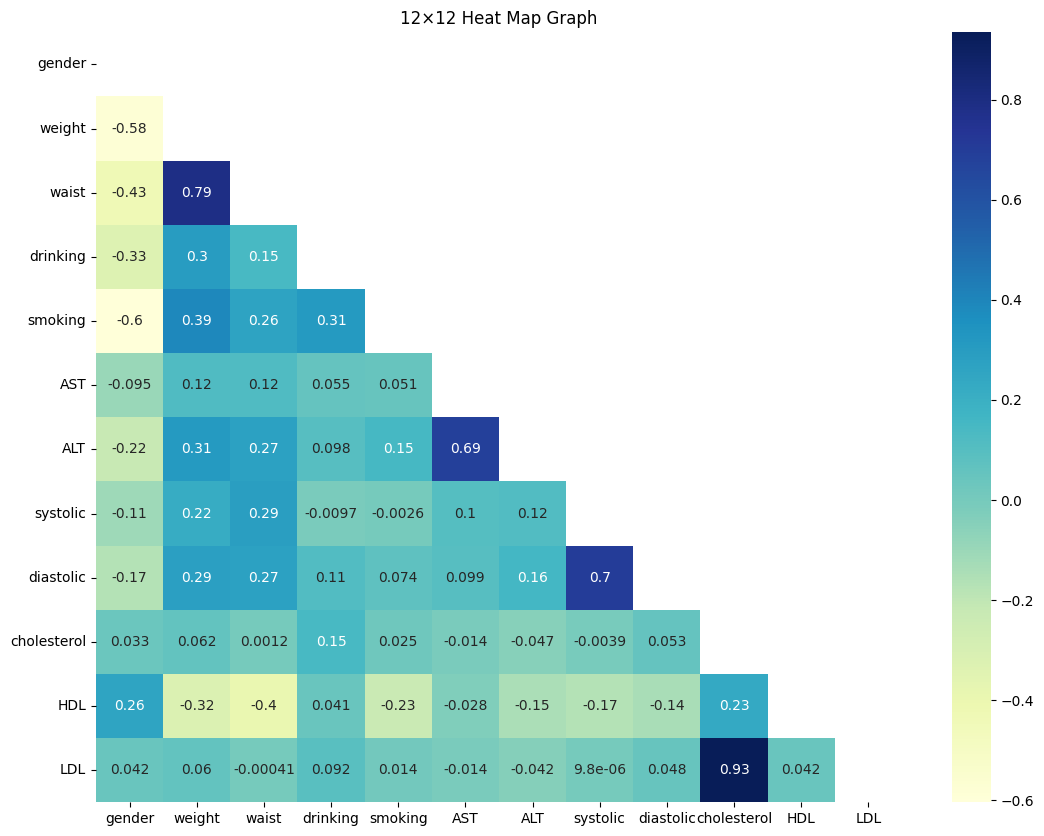

In [36]:
# 12x12 히트맵 그래프
fig, ax = plt.subplots()
fig.set_size_inches(13,10)

correlation_data12 = df_mod01_health12.corr()
upp_mat = np.triu(correlation_data12)
sns.heatmap(correlation_data12, annot=True, cmap='YlGnBu', mask=upp_mat)

ax.set_title('12×12 Heat Map Graph')

plt.show()

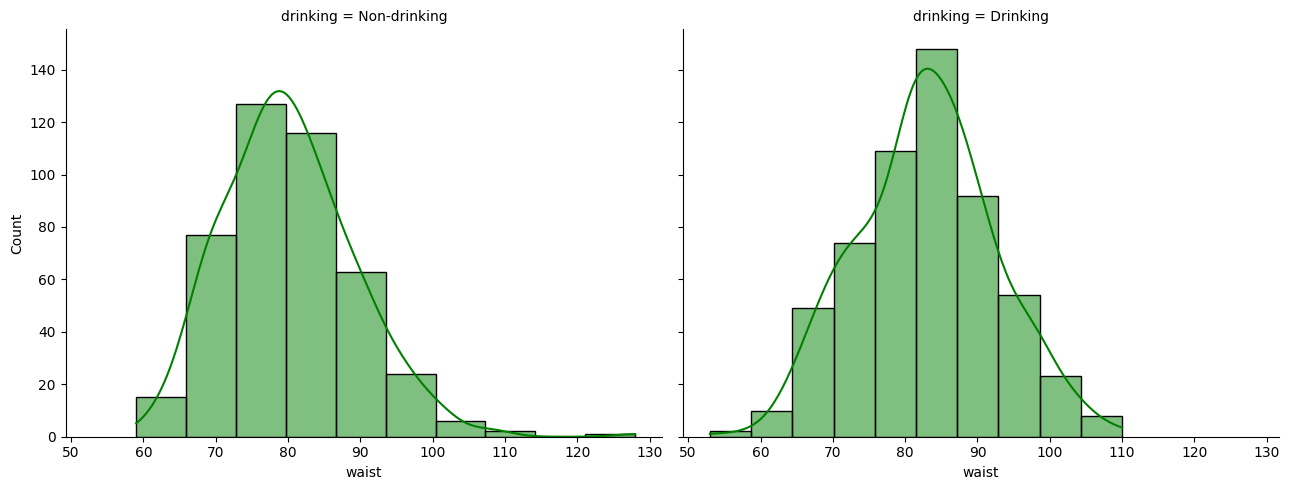

In [38]:
# 열 기준으로 나눈 패싯 그리그 그래프
fg = sns.FacetGrid(df_mod00_health, col='drinking', height=5, aspect=1.3)
fg.map(sns.histplot, 'waist', bins=10, color='g', kde=True)
plt.show()

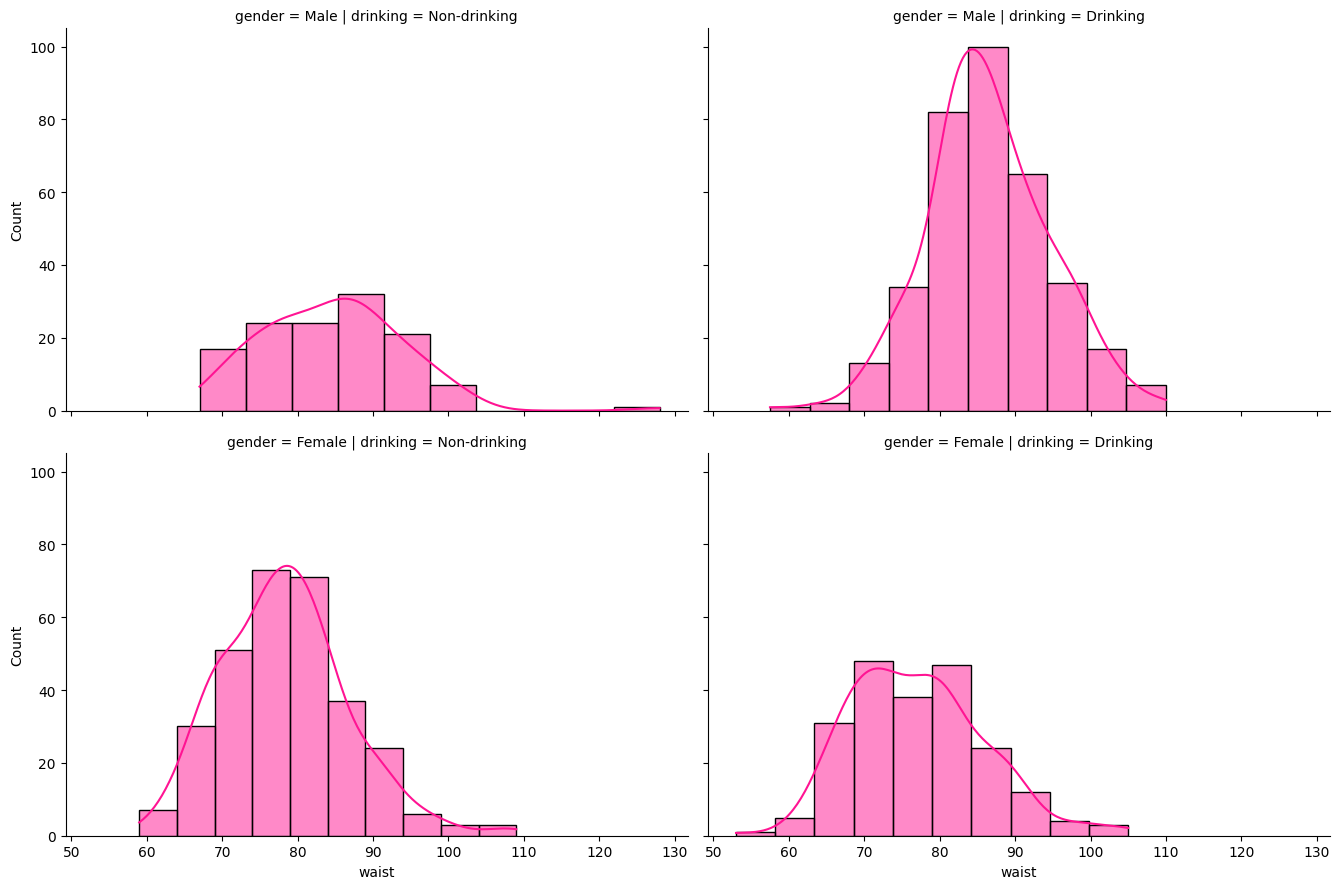

In [39]:
# 행과 열 기준으로 나눈 패싯 그리드 그래프 그리기
fg = sns.FacetGrid(df_mod00_health, row='gender', col='drinking', height=4.5, aspect=1.5)
fg.map(sns.histplot, 'waist', bins=10, color='deeppink', kde=True)
plt.show()

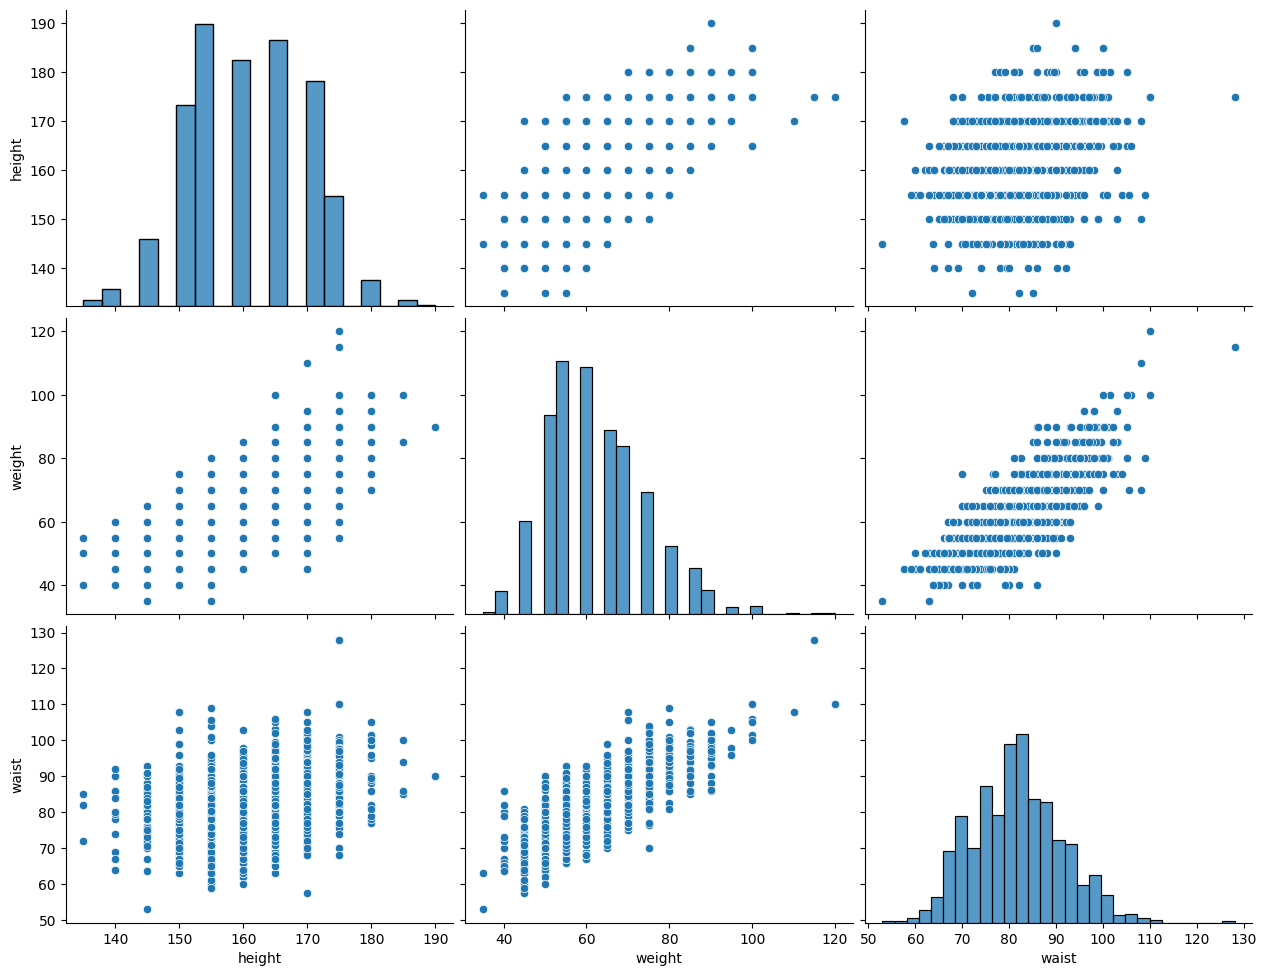

In [40]:
# 페어 플롯 그래프
sns.pairplot(df_mod00_health, height=3.3, aspect=1.3)
plt.show()

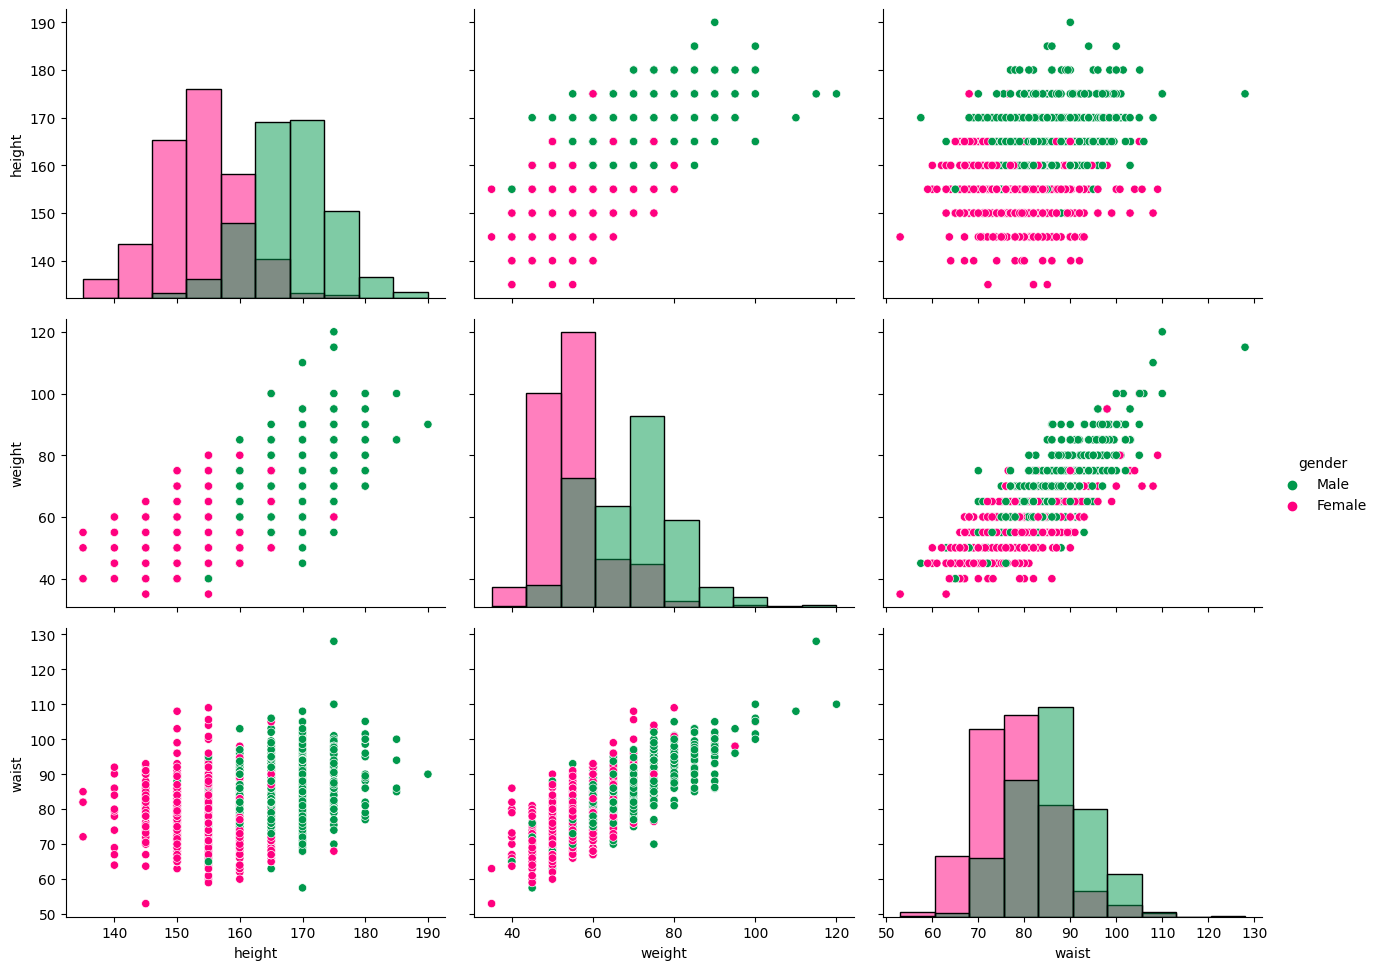

In [42]:
# PairGrid() 함수로 그린 페어 플롯 그래프
color = ['#00994C', '#FF007F']
pp = sns.PairGrid(df_mod00_health, hue='gender', palette=color, height=3.3, aspect=1.3)
pp.map_diag(sns.histplot, bins=10)
pp.map_offdiag(sns.scatterplot)
pp.add_legend()
plt.show()